In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

Using flux=620 for SNR=5 (see cell #4 of notebook '30. 4a. other psf models-real PSFs')

In [ ]:
n_runs = 100
#psf2 = [2.2, 2.4]
testResults1 = dit.multi.runMultiDiffimTests(varSourceFlux=620., n_runs=n_runs, psf2=psf2)
testResults2 = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), n_runs=n_runs, 
                                             templateNoNoise=False, psf2=psf2)
testResults3 = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), n_runs=n_runs, 
                                             templateNoNoise=False, skyLimited=False, psf2=psf2)

In [3]:
dit.dumpObjects((testResults1, testResults2, testResults3), 'tmp_pkl')

In [2]:
testResults1, testResults2, testResults3 = dit.loadObjects('tmp_pkl')
#testResults1, testResults2, testResults3 = dit.loadObjects('tmp_pkl_1000runs')

FN: 
ALstack           28.75
ALstack_decorr    29.78
SZOGY             34.07
ZOGY              28.26
dtype: float64
FP: 
ALstack           4.91
ALstack_decorr    4.63
SZOGY             6.64
ZOGY              5.07
dtype: float64
TP: 
ALstack           21.25
ALstack_decorr    20.22
SZOGY             15.93
ZOGY              21.74
dtype: float64


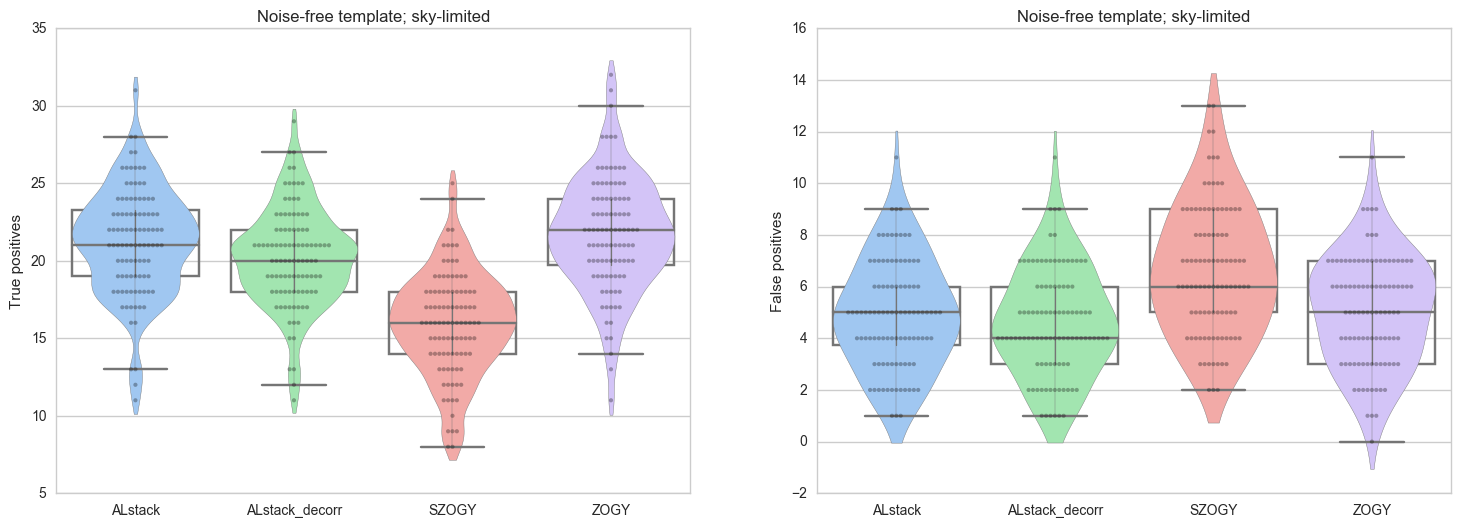

In [3]:
dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited');

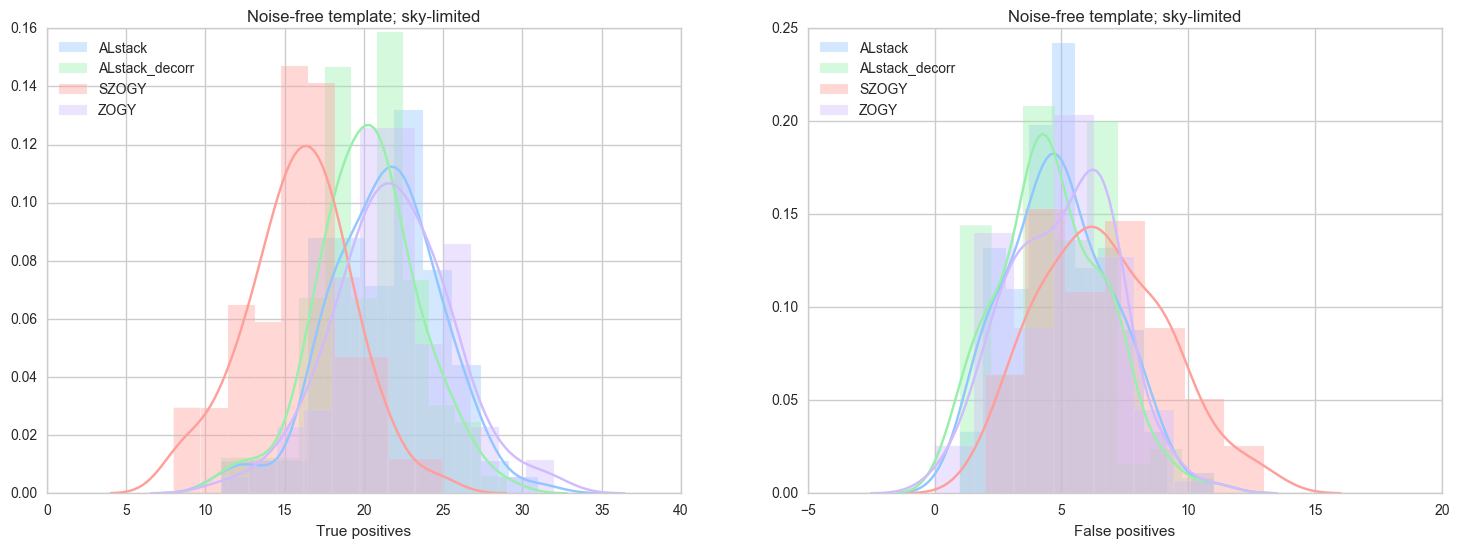

In [4]:
dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited', asHist=True, doPrint=False);

Noise-free template; sky-limited :
AL:		5.09648171076 +/- 0.991147579335
AL(decorr):	5.08483028778 +/- 0.986089891889
ZOGY:		5.05995063186 +/- 0.98831191692


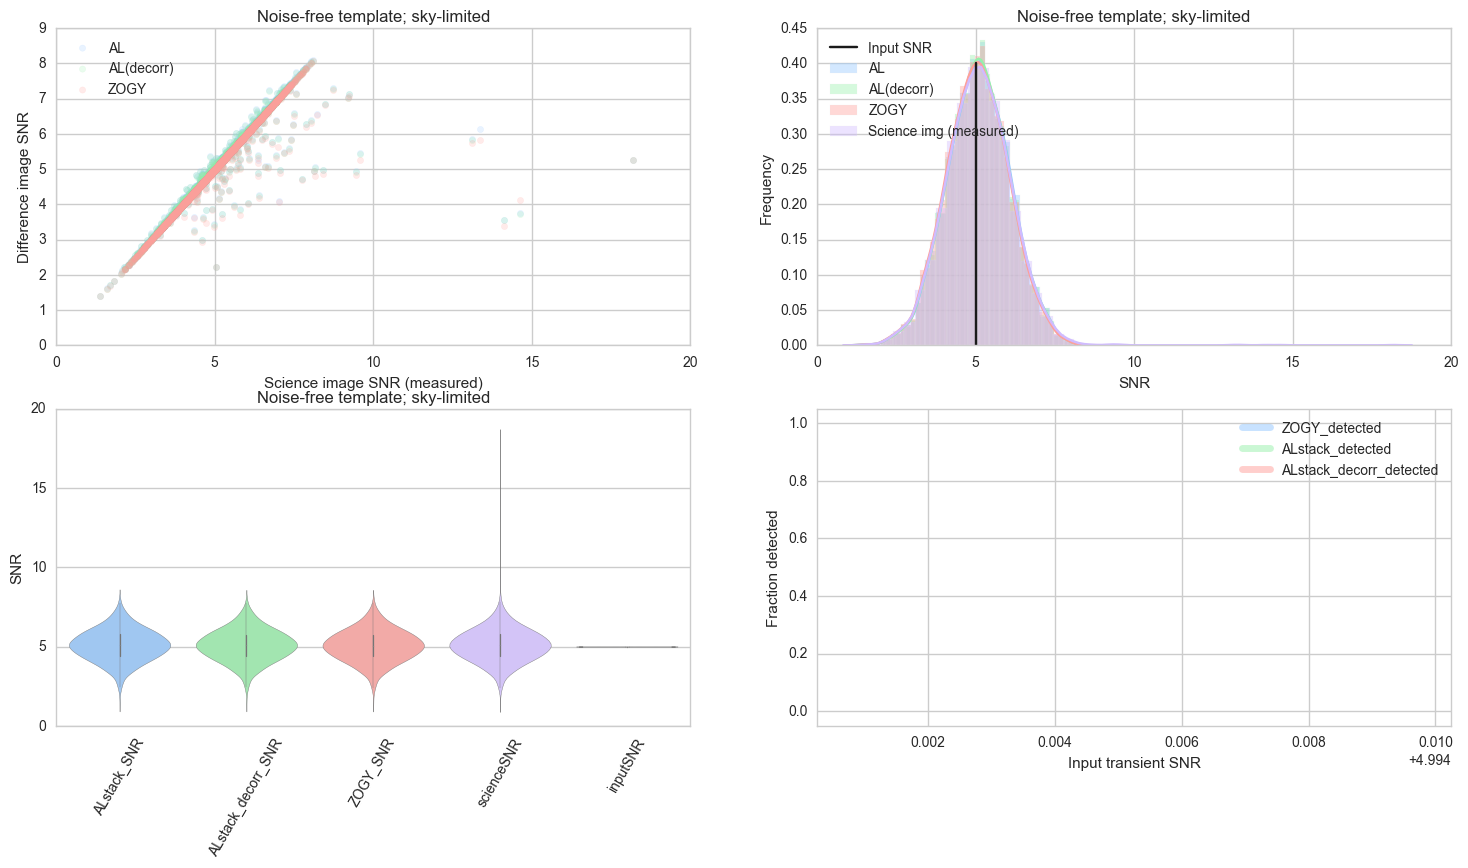

In [5]:
dit.multi.plotSnrResults(testResults1, title='Noise-free template; sky-limited');

FN: 
ALstack           10.21
ALstack_decorr    24.51
SZOGY             26.99
ZOGY              20.47
dtype: float64
FP: 
ALstack           11.24
ALstack_decorr     3.79
SZOGY              6.17
ZOGY               4.92
dtype: float64
TP: 
ALstack           39.79
ALstack_decorr    25.49
SZOGY             23.01
ZOGY              29.53
dtype: float64


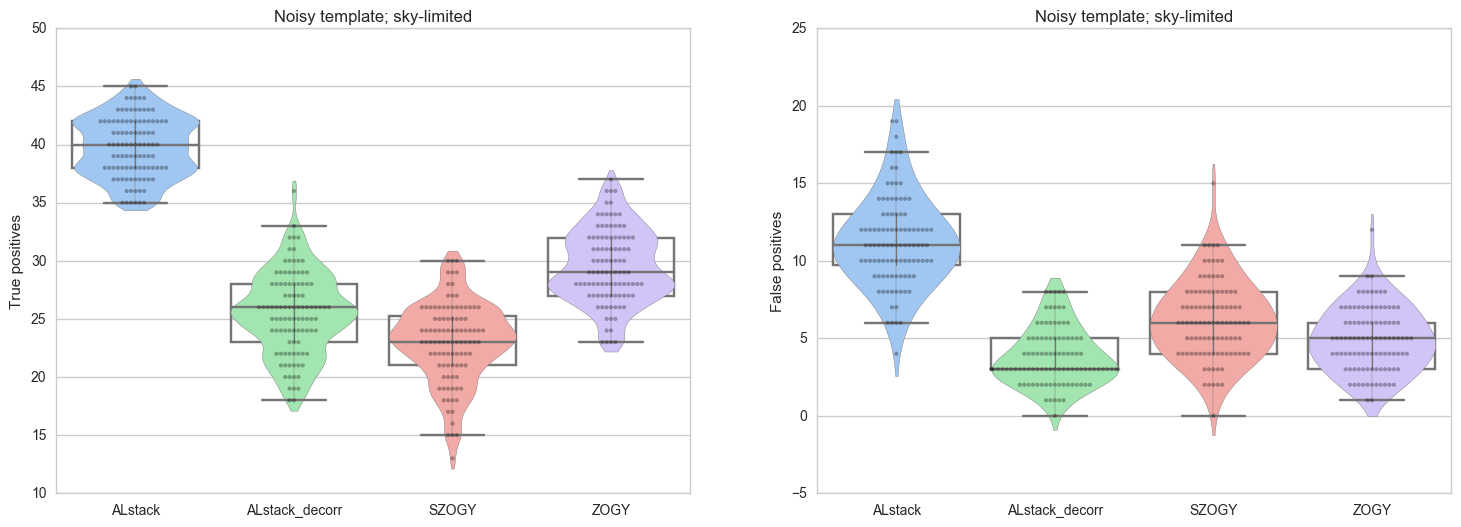

In [6]:
dit.multi.plotResults(testResults2, title='Noisy template; sky-limited');

Noisy template; sky-limited :
AL:		7.04453494926 +/- 1.26285707291
AL(decorr):	5.26444129195 +/- 0.935512868548
ZOGY:		5.4860740007 +/- 1.00929023494


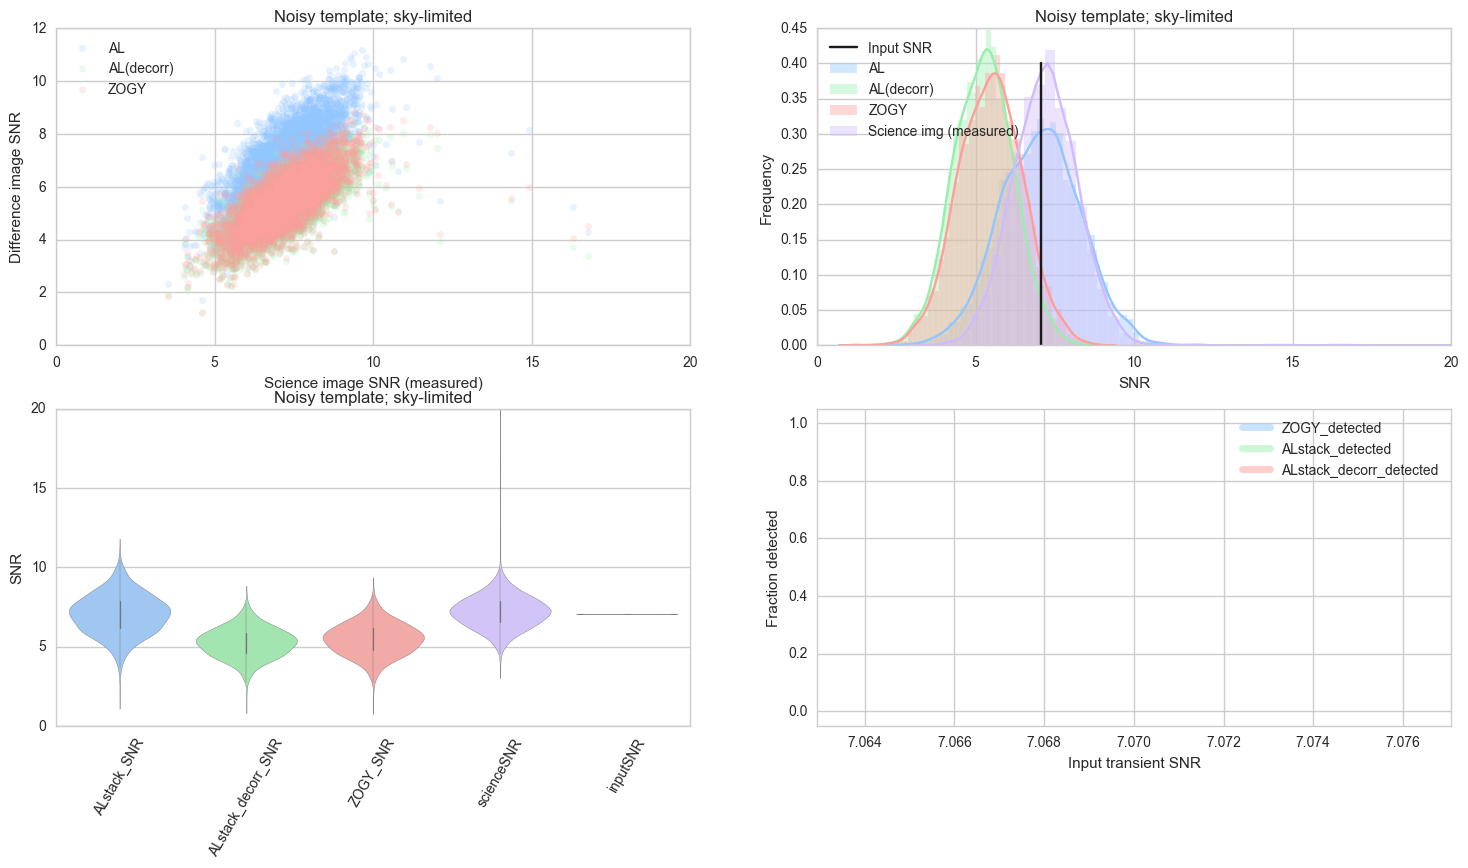

In [7]:
dit.multi.plotSnrResults(testResults2, title='Noisy template; sky-limited');

FN: 
ALstack           10.62
ALstack_decorr    27.12
SZOGY             28.33
ZOGY              22.00
dtype: float64
FP: 
ALstack           11.01
ALstack_decorr     3.41
SZOGY              5.77
ZOGY               4.54
dtype: float64
TP: 
ALstack           39.38
ALstack_decorr    22.88
SZOGY             21.67
ZOGY              28.00
dtype: float64


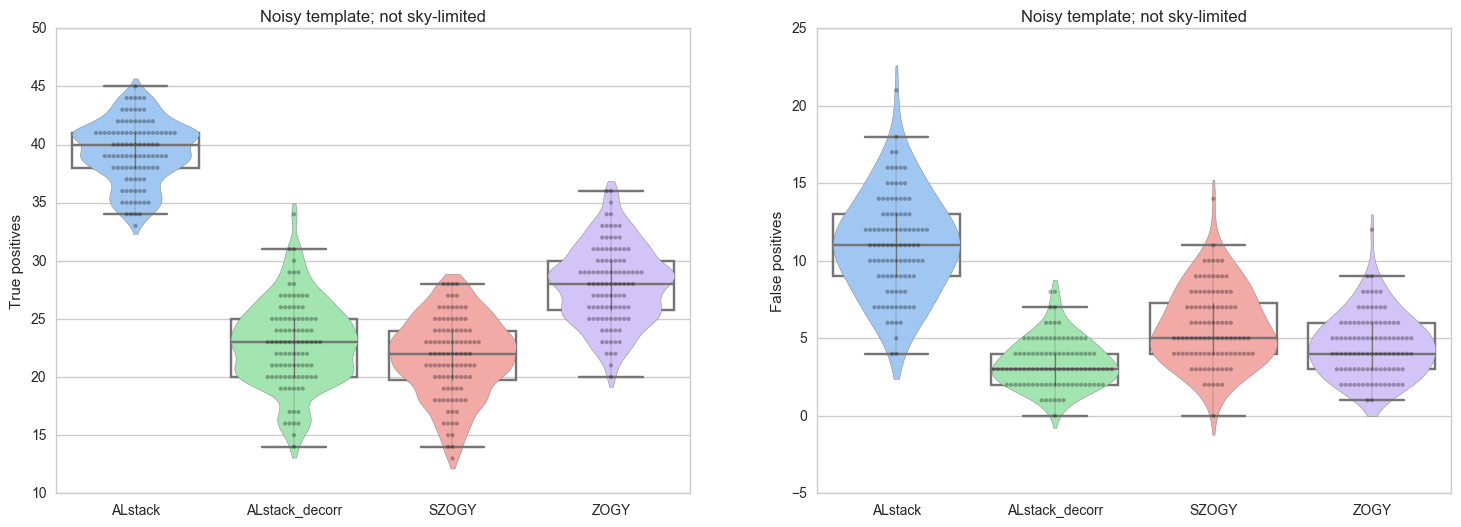

In [8]:
dit.multi.plotResults(testResults3, title='Noisy template; not sky-limited');

Noisy template; not sky-limited :
AL:		6.81114706783 +/- 1.20403373045
AL(decorr):	5.10034911918 +/- 0.893898726564
ZOGY:		5.36756188238 +/- 0.986978256427


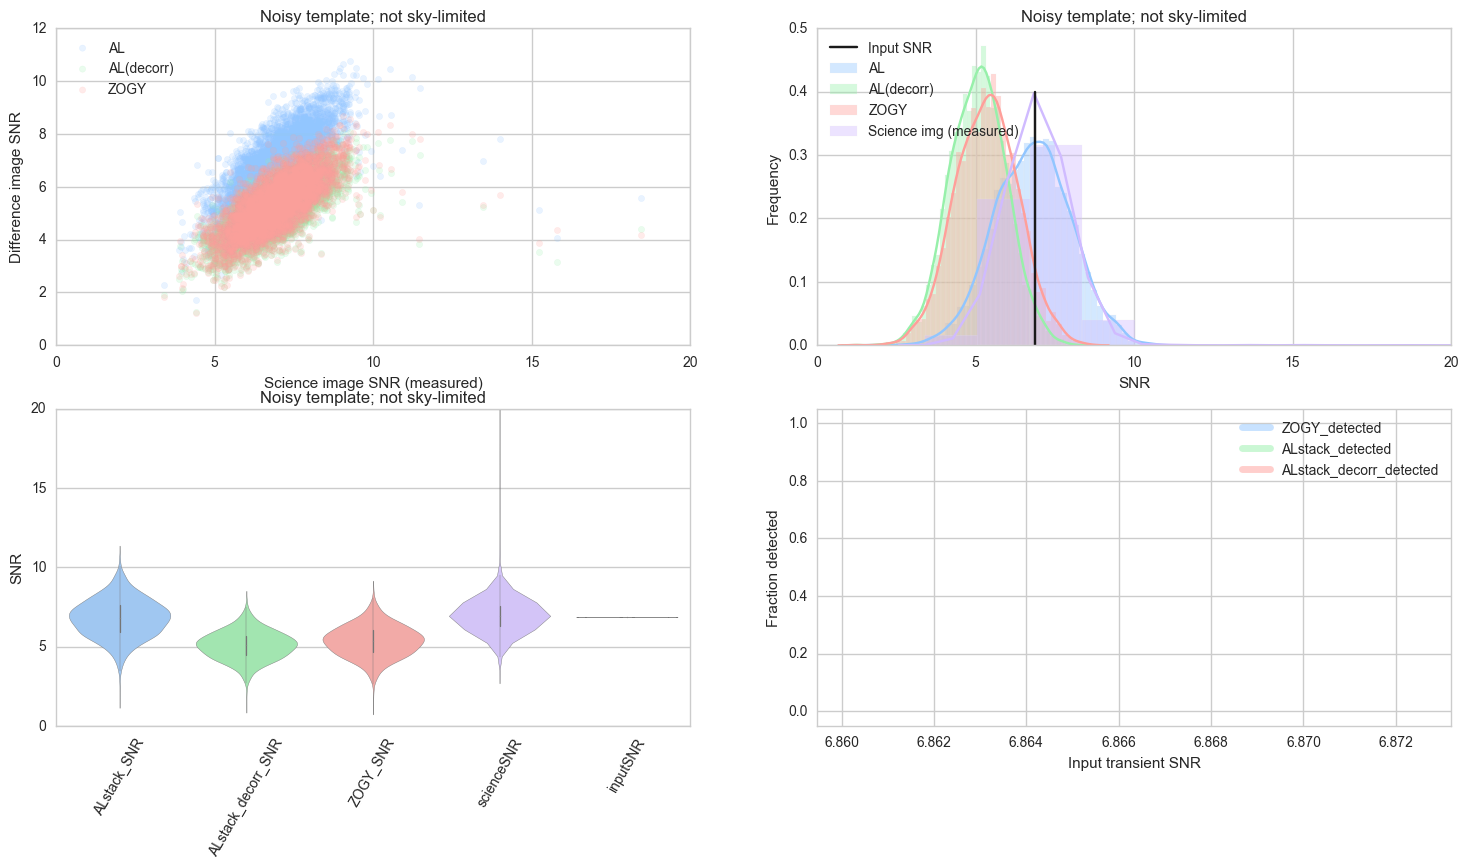

In [9]:
dit.multi.plotSnrResults(testResults3, title='Noisy template; not sky-limited');

#### Figure out what is up with the runs where `ZOGY` is performing poorly.

This goes away when we force it to use `zogyImageSpace=False`.

`ALstack_decorr` seems to be performing poorly (even after fixing the bug that in `ALstack_decorr` PSF calculation, `tvar` and `svar` were mixed up).

This analysis has been moved to notebook `31. new tests-issues with AL.ipynb`.

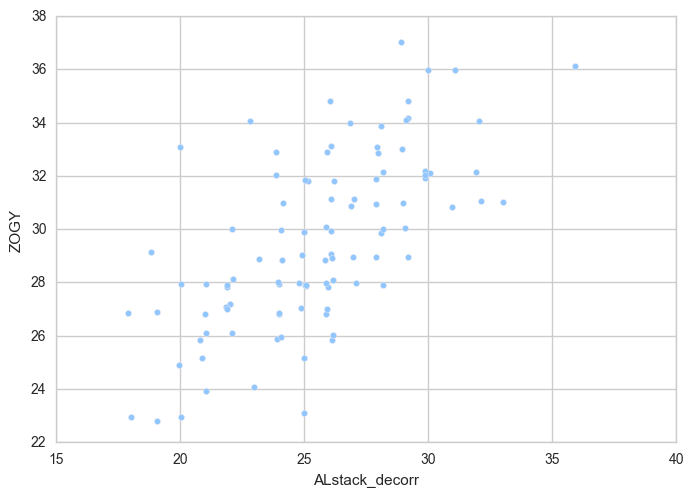

In [10]:
TP, FP, FN = dit.multi.plotResults(testResults2, actuallyPlot=False, doPrint=False)
TP.ALstack_decorr += np.random.uniform(-0.2, 0.2, TP.shape[0])
TP.ZOGY += np.random.uniform(-0.2, 0.2, TP.shape[0])
TP.plot.scatter('ALstack_decorr', 'ZOGY')

In [11]:
TP, FP, FN = dit.multi.plotResults(testResults2, actuallyPlot=False, doPrint=False)
print np.max(TP.ALstack_decorr/TP.ZOGY)
print 1./np.min(TP.ALstack_decorr/TP.ZOGY)
TP[TP.ZOGY/TP.ALstack_decorr > 1.26]

1.08695652174
1.65


,ALstack,ALstack_decorr,SZOGY,ZOGY
5,42,26,26,33
9,40,21,18,27
14,39,21,24,28
15,35,18,15,23
17,40,24,19,31
20,36,19,24,29
24,37,22,23,28
30,44,22,22,28
35,43,23,24,34
43,43,22,23,30
